# Taller 3

Declaración Ética: Los autores Cristóbal Lobos y Javier Valladares declaran que el trabajo presentado acá es original y basado en las reglas estipuladas, y las partes del código que no son trabajo original se encuentran referenciadas.

Aporte por persona:

Javier Valladares:

-Programó el selector mediante Chi2, además, de la selección de los parámetros para el KNN y la selección de los modelos.

Cristóbal Lobos:

-Programó el PCA, y las cross-validation mediante GridSearchCV, además, de programar los graficos para los distintos atributos.

Fue trabajo de ambos elegir que datos utilizar para entrenar y la decisión de cual acercamiento fue el mejor para realizar la predicción utilizando los datos test.

Link del video: https://drive.google.com/file/d/16ywNIKX43IF_0yDQ5W6kSprXbCQFAv8E/view?usp=sharing

In [ ]:
from google.colab import drive
import pandas as pd #dataframes
import numpy as np #algebralineal
import warnings
warnings.filterwarnings("ignore")
#visualizacion
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import io
# seed the pseudorandom number generator
from random import seed
from random import randint
import random

In [ ]:
!wget www.inf.utfsm.cl/~jnancu/biomedata_test_abundance.csv

!wget www.inf.utfsm.cl/~jnancu/biomedata_train_abundance.csv

!wget www.inf.utfsm.cl/~jnancu/biomedata_test_marker.csv

!wget www.inf.utfsm.cl/~jnancu/biomedata_train_marker.csv

URL transformed to HTTPS due to an HSTS policy
--2021-12-23 17:34:58--  https://www.inf.utfsm.cl/~jnancu/biomedata_test_abundance.csv
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 481094 (470K) [application/octet-stream]
Saving to: ‘biomedata_test_abundance.csv.4’

biomedata_test_abun 100%[===================>] 469.82K   906KB/s    in 0.5s    

2021-12-23 17:35:00 (906 KB/s) - ‘biomedata_test_abundance.csv.4’ saved [481094/481094]

URL transformed to HTTPS due to an HSTS policy
--2021-12-23 17:35:00--  https://www.inf.utfsm.cl/~jnancu/biomedata_train_abundance.csv
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1263402 (1.2M) [application/octet-stream]
Saving 

# Datos

In [ ]:
data_1 = pd.read_csv("/content/biomedata_train_abundance.csv")

In [ ]:
data_1.head()

,Unnamed: 0,Cirrhosis,code_study,country,gender,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifid

In [ ]:
data_1.shape

(621, 717)

In [ ]:
data_1.columns

Index(['Unnamed: 0', 'Cirrhosis', 'code_study', 'country', 'gender',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified',
       'k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae',
       'k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified',
       'k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified',
       ...
       'k__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Pseudomonadales|f__Pseudomonadaceae|g__Pseudomonas|s__Pseudomonas_fragi',
       'k__Bacteria|p__Proteobacteria|c__

In [ ]:
#data_2 = pd.read_csv("/content/biomedata_train_marker.csv")
#data_2.head()

## Graficos

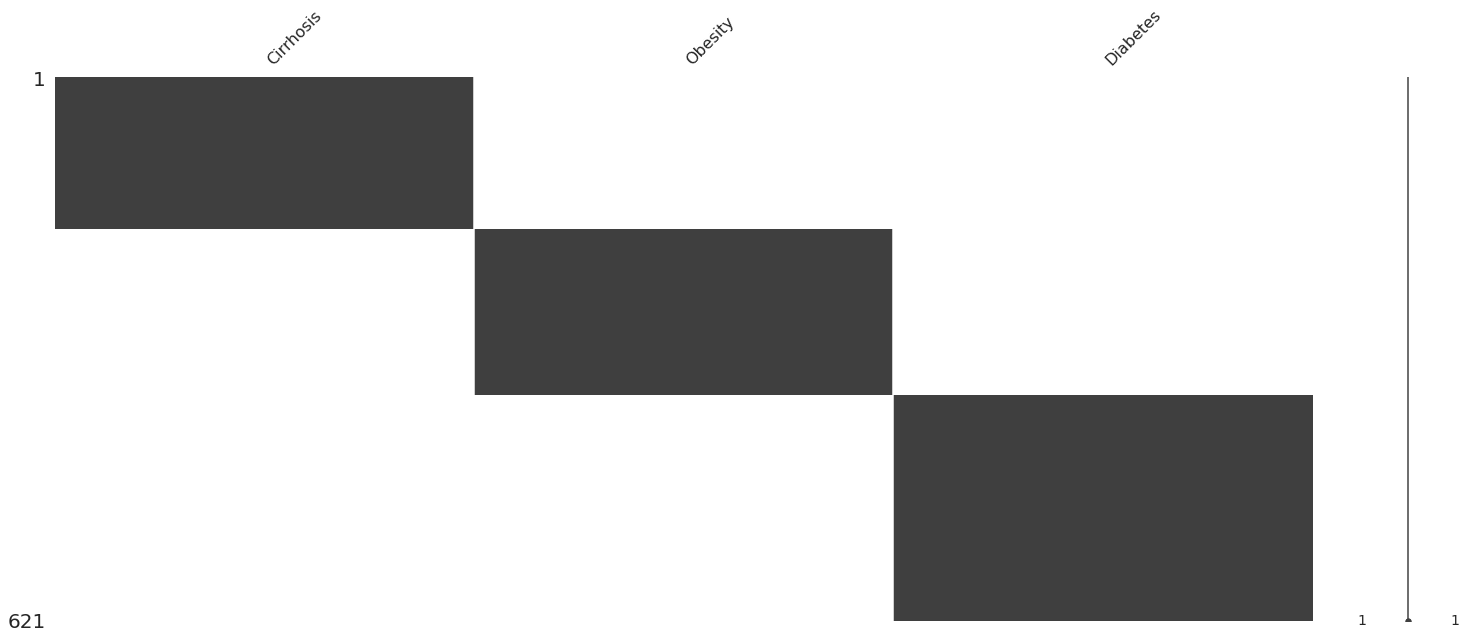

In [ ]:
import missingno as msno
df_casos = data_1[['Cirrhosis', 'Obesity' ,'Diabetes']]

msno.matrix(df_casos)

In [ ]:
def nan_values(x):
  if np.isnan(x):
    return -1
  else: 
    return x

In [ ]:
data = data_1.copy()

#data['Cirrhosis'] = data.apply(lambda x: nan_values(x['Cirrhosis']),axis=1) #Identificamos los valores Nan como -1
#data['Diabetes'] = data.apply(lambda x: nan_values(x['Diabetes']),axis=1) #Identificamos los valores Nan como -1
#data['Obesity'] = data.apply(lambda x: nan_values(x['Obesity']),axis=1) #Identificamos los valores Nan como -1

## Cirrosis

1


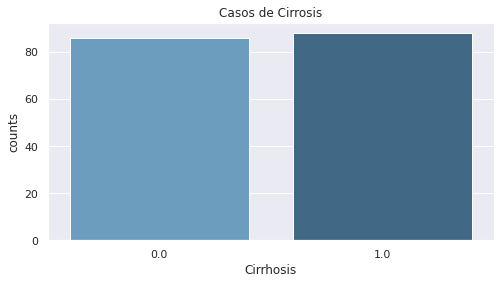

In [ ]:
df = data[["Cirrhosis"]]
print(len(df.columns))
gr = df.groupby(['Cirrhosis']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,4),nrows=1)
sns.barplot(data=gr, x='Cirrhosis', y='counts', palette="Blues_d",ax=ax)
ax.set_title('Casos de Cirrosis')
plt.show()
print("")

## Obesidad

1


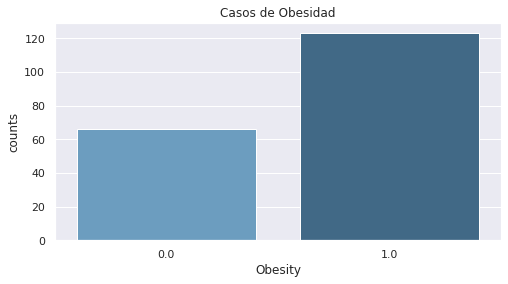

In [ ]:
df = data[["Obesity"]]
print(len(df.columns))
gr = df.groupby(['Obesity']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,4),nrows=1)
sns.barplot(data=gr, x='Obesity', y='counts', palette="Blues_d",ax=ax)
ax.set_title('Casos de Obesidad')
plt.show()
print("")

## Diabetes

1


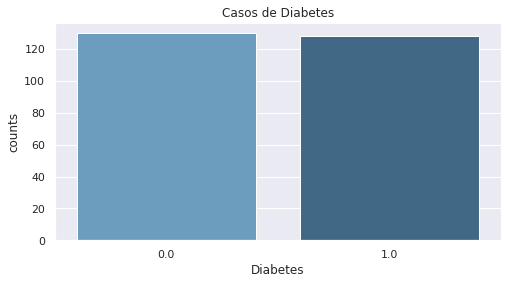

In [ ]:
df = data[["Diabetes"]]
print(len(df.columns))
gr = df.groupby(['Diabetes']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,4),nrows=1)
sns.barplot(data=gr, x='Diabetes', y='counts', palette="Blues_d",ax=ax)
ax.set_title('Casos de Diabetes')
plt.show()
print("")

## Genero


1


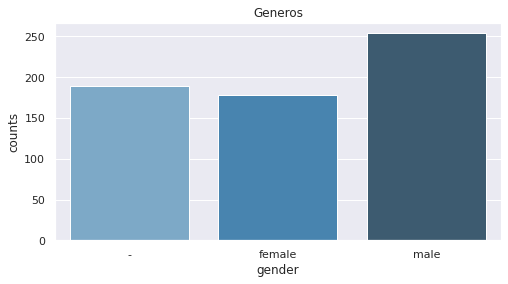

In [ ]:
df = data[["gender"]]
print(len(df.columns))
gr = df.groupby(['gender']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,4),nrows=1)
sns.barplot(data=gr, x='gender', y='counts', palette="Blues_d",ax=ax)
ax.set_title('Generos')
plt.show()
print("")

## País

1


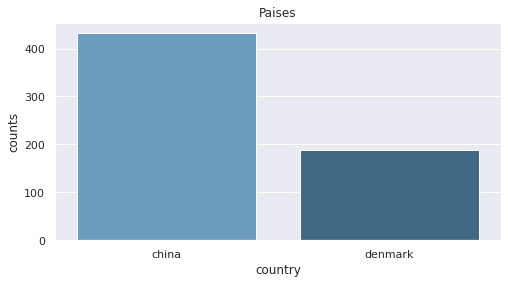

In [ ]:
df = data[["country"]]
print(len(df.columns))
gr = df.groupby(['country']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,4),nrows=1)
sns.barplot(data=gr, x='country', y='counts', palette="Blues_d",ax=ax)
ax.set_title('Paises')
plt.show()
print("")

## Estudios

1


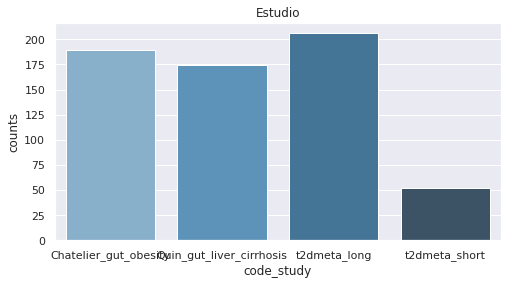

In [ ]:
df = data[["code_study"]]
print(len(df.columns))
gr = df.groupby(['code_study']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,4),nrows=1)
sns.barplot(data=gr, x='code_study', y='counts', palette="Blues_d",ax=ax)
ax.set_title('Estudio')
plt.show()
print("")

# Solución


In [ ]:
data = data_1.copy().drop(columns=["Unnamed: 0"])
data.head()

,Cirrhosis,code_study,country,gender,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_

In [ ]:
def replace_country(x):
  if x == "china":
    return 2
  else: 
    return 0

def replace_gender(x):
  seed(42)
  if x == "female":
    return 0
  if x == "male":
    return 2 
  else: 
    return 1

def replace_study(x):
  if x == "t2dmeta_short":
    return 0
  if x == "t2dmeta_long":
    return 4
  if x == "Quin_gut_liver_cirrhosis":
    return 2
  else: 
    return 3

In [ ]:
data['gender'] = data.apply(lambda x: replace_gender(x['gender']),axis=1) #Pasamos a entero los generos
data['country'] = data.apply(lambda x: replace_country(x['country']),axis=1) #Pasamos a entero los paises
data['code_study'] = data.apply(lambda x: replace_study(x['code_study']),axis=1) #Pasamos a entero los estudios

## Separamos los datos por enfermedad

### Cirrhosis

In [ ]:
data_cirrosis = data.dropna(axis=0, subset=['Cirrhosis']).drop(columns = ["Diabetes","Obesity"])
data_cirrosis.shape

(174, 714)

### Diabetes

In [ ]:
data_diabetes = data.dropna(axis=0, subset=['Diabetes']).drop(columns = ["Cirrhosis","Obesity"])
data_diabetes.shape

(258, 714)

### Obesity

In [ ]:
data_obesity = data.dropna(axis=0, subset=['Obesity']).drop(columns = ["Diabetes","Cirrhosis"])
data_obesity.shape

(189, 714)

## Trabajo con los datos

### Definimos los datos

In [293]:
X = data.drop(columns = ["Diabetes","Obesity","Cirrhosis","country","gender","code_study"])

Xc = data_cirrosis.drop(columns=["Cirrhosis","country","gender","code_study"])
yc = data_cirrosis[["Cirrhosis"]]

Xd = data_diabetes.drop(columns=["Diabetes","country","gender","code_study"])
yd = data_diabetes[["Diabetes"]]


Xo = data_obesity.drop(columns=["Obesity","country","gender","code_study"])
yo = data_obesity[["Obesity"]]

In [294]:
print("Cirrhosis: ",Xc.shape)
print("Diabetes: ",Xd.shape)
print("Obesity: ",Xo.shape)

nan_c = Xc.columns[Xc.isna().any()].tolist()
print("Columnas Nan Cirrosis: " + str(len(nan_c)))

nan_d = Xd.columns[Xd.isna().any()].tolist()
print("Columnas Nan Cirrosis: " + str(len(nan_d)))

nan_o = Xo.columns[Xo.isna().any()].tolist()
print("Columnas Nan Cirrosis: " + str(len(nan_o)))

Cirrhosis:  (174, 710)
Diabetes:  (258, 710)
Obesity:  (189, 710)
Columnas Nan Cirrosis: 168
Columnas Nan Cirrosis: 138
Columnas Nan Cirrosis: 245


## Trabajo con los datos NaN

### Promedio

In [ ]:
Xc = Xc.fillna(X.mean())
Xd = Xd.fillna(X.mean())
Xo = Xo.fillna(X.mean())
X = X.fillna(X.mean())

In [ ]:
Xc.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bacteria|p__Actinobacteri

### Mediana

In [ ]:
Xc = Xc.fillna(X.median())
Xd = Xd.fillna(X.median())
Xo = Xo.fillna(X.median())
X = X.fillna(X.median())

In [ ]:
Xc.head()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bacteria|p__Actinobacteri

### Imputer

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="distance")
imputer.fit_transform(X)
X = imputer.transform(X)
Xc = imputer.transform(Xc)
Xd = imputer.transform(Xd)
Xo = imputer.transform(Xo)

In [ ]:
pd.DataFrame(Xc).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709
0,0.02959,0.00955,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.03373,0.00000,0.0,0.0,1.93316,0.18308,0.00068,0.0,0.0,0.0,0.0,...,0.000187,0.000001,0.000713,0.000029,0.0,0.0,0.0,0.0,0.0,0.000336,0.000871,0.0,0.0,0.000074,0.000102,0.000311,0.000081,0.0,0.000003,0.0,0.000087,0.000028,0.000021,0.000017,0.000042,0.000162,0.000122,0.000276,0.000737,0.000225,0.0,0.000037,0.000003,0.0,0.0,0.000112,0.000011,0.000011,0.000616,0.000045
1,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.00771,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.000187,0.000001,0.000713,0.000029,0.0,0.0,0.0,0.0,0.0,0.000336,0.000871,0.0,0.0,0.000074,0.000102,0.000311,0.000081,0.0,0.000003,0.0,0.000087,0.000028,0.000021,0.000017,0.000042,0.000162,0.000122,0.000276,0.000737,0.000225,0.0,0.000037,0.000003,0.0,0.0,0.000112,0.000011,0.000011,0.000616,0.000045
2,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.03469,0.00461,0.00000,0.0,0.0,0.0,0.0,...,0.000187,0.000001,0.000713,0.000029,0.0,0.0,0.0,0.0,0.0,0.000336,0.000871,0.0,0.0,0.000074,0.000102,0.000311,0.000081,0.0,0.000003,0.0,0.000087,0.000028,0.000021,0.000017,0.000042,0.000162,0.000122,0.000276,0.000737,0.000225,0.0,0.000037,0.000003,0.0,0.0,0.000112,0.000011,0.000011,0.000616,0.000045
3,0.29306,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.21281,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.00911,0.00000,0.0,0.0,0.0,0.0,...,0.000187,0.000001,0.000713,0.000029,0.0,0.0,0.0,0.0,0.0,0.000336,0.000871,0.0,0.0,0.000074,0.000102,0.000311,0.000081,0.0,0.000003,0.0,0.000087,0.000028,0.000021,0.000017,0.000042,0.000162,0.000122,0.000276,0.000737,0.000225,0.0,0.000037,0.000003,0.0,0.0,0.000112,0.000011,0.000011,0.000616,0.000045
4,0.00000,0.00000,0.0,0.0,0.0,0.00479,0.0,0.01766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.08371,0.0,0.0,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,...,0.000187,0.000001,0.000713,0.000029,0.0,0.0,0.0,0.0,0.0,0.000336,0.000871,0.0,0.0,0.000074,0.000102,0.000311,0.000081,0.0,0.000003,0.0,0.000087,0.000028,0.000021,0.000017,0.000042,0.000162,0.000122,0.000276,0.000737,0.000225,0.0,0.000037,0.000003,0.0,0.0,0.000112,0.000011,0.000011,0.000616,0.000045


## Reducción de dimensionalidad

### PCA

In [ ]:
#Elegimos los mejores 1600 atributos

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#j = 100
#j = 150

j = 170 #Cantidad de atributos final
pca_pipe = make_pipeline(MinMaxScaler((0,1)), PCA(n_components = j, svd_solver = 'randomized')) #Inicializamos nuestra función para pca
df_PCA = pd.DataFrame(pca_pipe.fit_transform(X)) #Filtramos los datos

df_PCA.columns = ["PC"+str(i+1) for i in range(j)] 

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
#Imprimimos las variancias del modelo PCA
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
percent_variance_cum = np.cumsum(percent_variance)
percent_variance_cum[j-50:j] 

array([76.88, 77.13, 77.38, 77.62, 77.86, 78.1 , 78.34, 78.57, 78.8 ,
       79.03, 79.26, 79.48, 79.7 , 79.92, 80.14, 80.35, 80.56, 80.77,
       80.98, 81.19, 81.39, 81.59, 81.79, 81.99, 82.18, 82.37, 82.56,
       82.75, 82.94, 83.13, 83.31, 83.49, 83.67, 83.85, 84.03, 84.2 ,
       84.37, 84.54, 84.71, 84.87, 85.03, 85.19, 85.35, 85.51, 85.66,
       85.81, 85.96, 86.11, 86.26, 86.41])

In [ ]:
Xc = pd.DataFrame(pca_pipe.fit_transform(Xc))
Xd = pd.DataFrame(pca_pipe.fit_transform(Xd))
Xo = pd.DataFrame(pca_pipe.fit_transform(Xo))

### Chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
#Nos aseguramos que no existan valores negativos para poder utilizar Chi2 
# k = 100 -> 0.52
#k = 170 ->  0.60
#k = 40 -> 0.53

skb_c =  SelectKBest(chi2, k=100).fit(MinMaxScaler((0,1)).fit_transform(Xc),yc)
skb_d =  SelectKBest(chi2, k=100).fit(MinMaxScaler((0,1)).fit_transform(Xd),yd)
skb_o =  SelectKBest(chi2, k=100).fit(MinMaxScaler((0,1)).fit_transform(Xo),yo)

Xc = pd.DataFrame(skb_c.transform(Xc))
Xd = pd.DataFrame(skb_d.transform(Xd))
Xo = pd.DataFrame(skb_o.transform(Xo))

In [ ]:
Xc["gender"] = data_cirrosis["gender"]
Xc["code_study"] = data_cirrosis["code_study"]
Xc["country"] = data_cirrosis["country"]

Xd["gender"] = data_diabetes["gender"].reset_index()["gender"]
Xd["code_study"] = data_diabetes["code_study"].reset_index()["code_study"]
Xd["country"] = data_diabetes["country"].reset_index()["country"]

Xo["gender"] = data_obesity["gender"].reset_index()["gender"]
Xo["code_study"] = data_obesity["code_study"].reset_index()["code_study"]
Xo["country"] = data_obesity["country"].reset_index()["country"]

## Modelos

In [ ]:
#Divimos la data ya filtrada por el PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

#random_state=42 -> 0.60


Xc_train, Xc_test, yc_train, yc_test = train_test_split( Xc, yc, test_size=0.2, random_state=42) #Dividimos los datos test y train
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xc_train, yc_train, test_size=0.1, random_state=42) #Dividimos los datos val y train

Xd_train, Xd_test, yd_train, yd_test = train_test_split( Xd, yd, test_size=0.2, random_state=42) #Dividimos los datos test y train
Xd_train, Xd_val, yd_train, yd_val = train_test_split(Xd_train, yd_train, test_size=0.1, random_state=42) #Dividimos los datos val y train

Xo_train, Xo_test, yo_train, yo_test = train_test_split( Xo, yo, test_size=0.2, random_state=42) #Dividimos los datos test y train
Xo_train, Xo_val, yo_train, yo_val = train_test_split(Xo_train, yo_train, test_size=0.1, random_state=42) #Dividimos los datos val y train


print("X,y Shapes:", Xc.shape, yc.shape)
print("X,y Train Shapes:", Xc_train.shape, yc_train.shape)
print("X,y Val Shapes:", Xc_val.shape, yc_val.shape)
print("X,y Test Shapes:", Xc_test.shape, yc_test.shape)

X,y Shapes: (174, 103) (174, 1)
X,y Train Shapes: (125, 103) (125, 1)
X,y Val Shapes: (14, 103) (14, 1)
X,y Test Shapes: (35, 103) (35, 1)


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

clfc = GridSearchCV(SVC(), param_grid,cv = 10,scoring = roc_auc_score)
clfc.fit(Xc_train, yc_train)
S_C = roc_auc_score(yc_val, clfc.predict(Xc_val))
print(S_C)

0.5


In [ ]:
clfd = GridSearchCV(SVC(), param_grid,cv = 10,scoring = roc_auc_score)
clfd.fit(Xd_train, yd_train)
S_D = roc_auc_score(yd_val, clfd.predict(Xd_val))
print(S_D)

0.5


In [ ]:
clfo = GridSearchCV(SVC(), param_grid,cv = 10,scoring = roc_auc_score)
clfo.fit(Xo_train, yo_train)
S_O = roc_auc_score(yo_val, clfo.predict(Xo_val))
print(S_O)

0.5


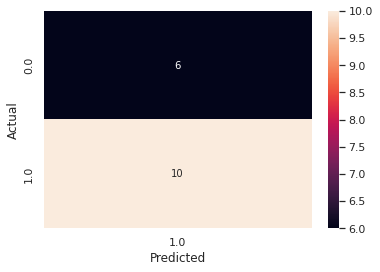

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
data_cf = {'y_Actual':    yo_val['Obesity'].tolist(),
        'y_Predicted': clfo.predict(Xo_val)
        }

df_cf = pd.DataFrame(data_cf, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df_cf['y_Actual'], df_cf['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
mauc = (S_C+S_D+S_O)/3
print("MAUC: ",mauc)

MAUC:  0.5


### KNN

#### Elección de K

Codigo extraido de la ayudantia número 9 del curso

##### Cirrhosis

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

val_accuracies = []
train_accuracies = []
test_accuracies = []

K_range = range(1,10)

for K_val in K_range:

    model = KNeighborsClassifier(n_neighbors=K_val, weights='uniform', p=2, metric='minkowski')
    model.fit(Xc_train, yc_train)
    
    train_acc = roc_auc_score(yc_train, model.predict(Xc_train))
    val_acc = roc_auc_score(yc_val, model.predict(Xc_val))
    test_acc = roc_auc_score(yc_test, model.predict(Xc_test))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)


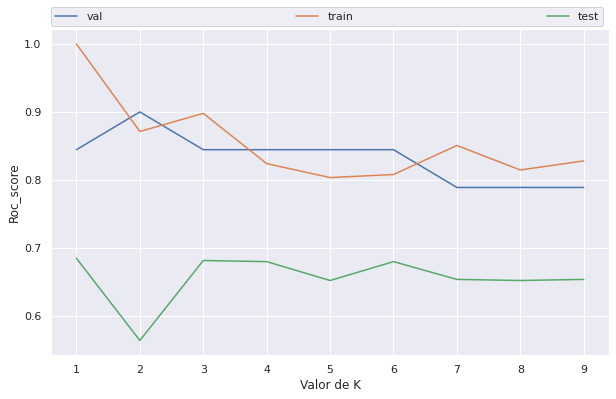

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(K_range,val_accuracies,label='val')
ax.plot(K_range,train_accuracies,label='train')
ax.plot(K_range,test_accuracies,label='test')
ax.set_xlabel("Valor de K")
ax.set_ylabel("Roc_score")
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0.)
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0.)
plt.show()

##### Obesity

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

val_accuracies = []
train_accuracies = []
test_accuracies = []

K_range = range(1,10)

for K_val in K_range:

    model = KNeighborsClassifier(n_neighbors=K_val, weights='uniform', p=2, metric='minkowski')
    model.fit(Xo_train, yo_train)
    
    train_acc = roc_auc_score(yo_train, model.predict(Xo_train))
    val_acc = roc_auc_score(yo_val, model.predict(Xo_val))
    test_acc = roc_auc_score(yo_test, model.predict(Xo_test))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)


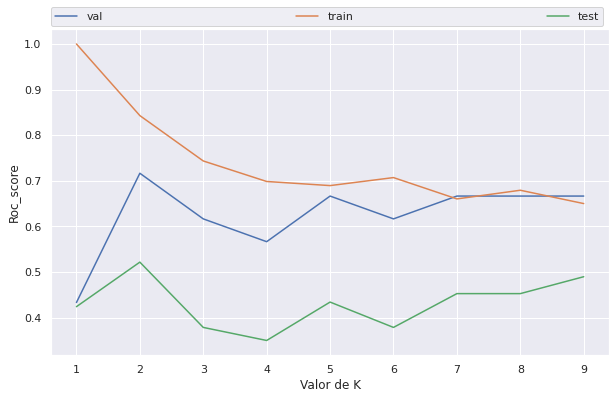

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(K_range,val_accuracies,label='val')
ax.plot(K_range,train_accuracies,label='train')
ax.plot(K_range,test_accuracies,label='test')
ax.set_xlabel("Valor de K")
ax.set_ylabel("Roc_score")
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0.)
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0.)
plt.show()

##### Diabetes

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

val_accuracies = []
train_accuracies = []
test_accuracies = []

K_range = range(1,10)

for K_val in K_range:

    model = KNeighborsClassifier(n_neighbors=K_val, weights='uniform', p=2, metric='minkowski')
    model.fit(Xd_train, yd_train)
    
    train_acc = roc_auc_score(yd_train, model.predict(Xd_train))
    val_acc = roc_auc_score(yd_val, model.predict(Xd_val))
    test_acc = roc_auc_score(yd_test, model.predict(Xd_test))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

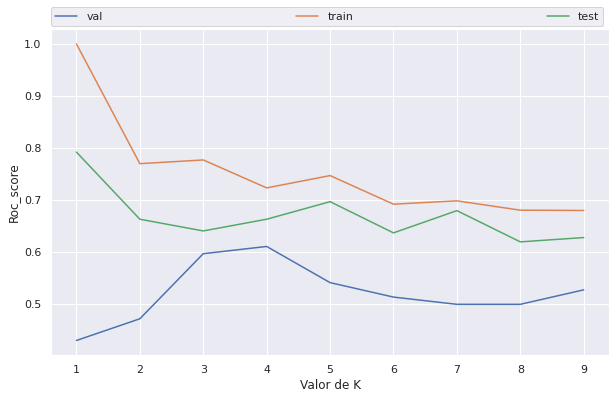

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(K_range,val_accuracies,label='val')
ax.plot(K_range,train_accuracies,label='train')
ax.plot(K_range,test_accuracies,label='test')
ax.set_xlabel("Valor de K")
ax.set_ylabel("Roc_score")
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0.)
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0.)
plt.show()

#### Modelos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
clfc = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2, metric='minkowski')
clfc.fit(Xc_train,yc_train)

S_C = roc_auc_score(yc_val, clfc.predict(Xc_val))

print(S_C)

0.8444444444444443


In [ ]:
clfd =  KNeighborsClassifier(n_neighbors=5,weights='uniform', p=2, metric='minkowski')
clfd.fit(Xd_train,yd_train)
S_D = roc_auc_score(yd_val, clfd.predict(Xd_val))
print(S_D)

0.5416666666666667


In [ ]:
clfo =  KNeighborsClassifier(n_neighbors=6,weights='uniform', p=2, metric='minkowski')
clfo.fit(Xo_train,yo_train)
S_O = roc_auc_score(yo_val, clfo.predict(Xo_val))
print(S_O)

0.6166666666666667


In [ ]:
mauc = (S_C+S_D+S_O)/3
print("MAUC: ",mauc)

MAUC:  0.6675925925925926


# Modelo Final

### Definimos los datos

In [ ]:
X = data.drop(columns = ["Diabetes","Obesity","Cirrhosis","country","gender","code_study"])

Xc = data_cirrosis.drop(columns=["Cirrhosis","country","gender","code_study"])
yc = data_cirrosis[["Cirrhosis"]]

Xd = data_diabetes.drop(columns=["Diabetes","country","gender","code_study"])
yd = data_diabetes[["Diabetes"]]


Xo = data_obesity.drop(columns=["Obesity","country","gender","code_study"])
yo = data_obesity[["Obesity"]]

In [ ]:
print("Cirrhosis: ",Xc.shape)
print("Diabetes: ",Xd.shape)
print("Obesity: ",Xo.shape)

Cirrhosis:  (174, 710)
Diabetes:  (258, 710)
Obesity:  (189, 710)


## Reducción de dimensionalidad

### Imputer

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")
imputer.fit_transform(X)
Xc = imputer.transform(Xc)
Xd = imputer.transform(Xd)
Xo = imputer.transform(Xo)

### Chi2

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
#Nos aseguramos que no existan valores negativos para poder utilizar Chi2 
# k = 100 -> 0.52
#k = 170 ->  0.60
#k = 40 -> 0.53

skb_c =  SelectKBest(chi2, k=170).fit(MinMaxScaler((0,1)).fit_transform(Xc),yc)
skb_d =  SelectKBest(chi2, k=170).fit(MinMaxScaler((0,1)).fit_transform(Xd),yd)
skb_o =  SelectKBest(chi2, k=170).fit(MinMaxScaler((0,1)).fit_transform(Xo),yo)

Xc = pd.DataFrame(skb_c.transform(Xc))
Xd = pd.DataFrame(skb_d.transform(Xd))
Xo = pd.DataFrame(skb_o.transform(Xo))

In [ ]:
Xc["gender"] = data_cirrosis["gender"]
Xc["code_study"] = data_cirrosis["code_study"]
Xc["country"] = data_cirrosis["country"]

Xd["gender"] = data_diabetes["gender"].reset_index()["gender"]
Xd["code_study"] = data_diabetes["code_study"].reset_index()["code_study"]
Xd["country"] = data_diabetes["country"].reset_index()["country"]

Xo["gender"] = data_obesity["gender"].reset_index()["gender"]
Xo["code_study"] = data_obesity["code_study"].reset_index()["code_study"]
Xo["country"] = data_obesity["country"].reset_index()["country"]

## Modelo

In [ ]:
#Divimos la data ya filtrada por el PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

#random_state=42 -> 0.60


Xc_train, Xcc_test, yc_train, yc_test = train_test_split( Xc, yc, test_size=0.2, random_state=42) #Dividimos los datos test y train
Xc_train, Xc_val, yc_train, yc_val = train_test_split(Xc_train, yc_train, test_size=0.1, random_state=42) #Dividimos los datos val y train

Xd_train, Xd_test, yd_train, yd_test = train_test_split( Xd, yd, test_size=0.2, random_state=42) #Dividimos los datos test y train
Xd_train, Xd_val, yd_train, yd_val = train_test_split(Xd_train, yd_train, test_size=0.1, random_state=42) #Dividimos los datos val y train

Xo_train, Xo_test, yo_train, yo_test = train_test_split( Xo, yo, test_size=0.2, random_state=42) #Dividimos los datos test y train
Xo_train, Xo_val, yo_train, yo_val = train_test_split(Xo_train, yo_train, test_size=0.1, random_state=42) #Dividimos los datos val y train


print("X,y Shapes:", Xc.shape, yc.shape)
print("X,y Train Shapes:", Xc_train.shape, yc_train.shape)
print("X,y Val Shapes:", Xc_val.shape, yc_val.shape)
print("X,y Test Shapes:", Xc_test.shape, yc_test.shape)

X,y Shapes: (174, 173) (174, 1)
X,y Train Shapes: (125, 173) (125, 1)
X,y Val Shapes: (14, 173) (14, 1)
X,y Test Shapes: (35, 103) (35, 1)


## KNN

#### Modelos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
clfc =  KNeighborsClassifier(n_neighbors=3, weights='uniform', p=2, metric='minkowski')
clfc.fit(Xc_train,yc_train)
S_C = roc_auc_score(yc_val, clfc.predict(Xc_val))
print(S_C)

0.5888888888888888


In [ ]:
clfd =  KNeighborsClassifier(n_neighbors=5,weights='uniform', p=2, metric='minkowski')
clfd.fit(Xd_train,yd_train)
S_D = roc_auc_score(yd_val, clfd.predict(Xd_val))
print(S_D)

0.638888888888889


In [ ]:
clfo =  KNeighborsClassifier(n_neighbors=6,weights='uniform', p=2, metric='minkowski')
clfo.fit(Xo_train,yo_train)
S_O = roc_auc_score(yo_val, clfo.predict(Xo_val))
print(S_O)

0.5666666666666667


In [ ]:
mauc = (S_C+S_D+S_O)/3
print("MAUC: ",mauc)

MAUC:  0.5981481481481482


# Predicción

In [ ]:
submmit = pd.read_csv("/content/biomedata_test_abundance.csv")

In [ ]:
submmit = submmit.rename(columns = {'Unnamed: 0': 'Id'})
submmit = submmit.set_index('Id')
submmit.head()

,code_study,country,gender,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanococci|o__Methanococcales|f__Methanocaldococcaceae|g__Methanocaldococcaceae_unclassified,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Granulicella|s__Granulicella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_naeslundii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_oris,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_sp_HPA0247,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_viscosus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinopolysporaceae|g__Actinopolyspora|s__Actinopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Brevibacteriaceae|g__Brevibacterium|s__Brevibacterium_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_durum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Corynebacteriaceae|g__Corynebacterium|s__Corynebacterium_matruchotii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Kocuria|s__Kocuria_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_aeria,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_dentocariosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Propionibacteriaceae|g__Propionibacterium|s__Propionibacterium_propionicum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Pseudonocardia|s__Pseudonocardia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharomonospora|s__Saccharomonospora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Pseudonocardiaceae|g__Saccharopolyspora|s__Saccharopolyspora_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Alloscardovia|s__Alloscardovia_omnicolens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_animalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k_

In [ ]:
submmit['gender'] = submmit.apply(lambda x: replace_gender(x['gender']),axis=1) #Pasamos a entero los generos
submmit['country'] = submmit.apply(lambda x: replace_country(x['country']),axis=1) #Pasamos a entero los paises
submmit['code_study'] = submmit.apply(lambda x: replace_study(x['code_study']),axis=1) #Pasamos a entero los estudios

1


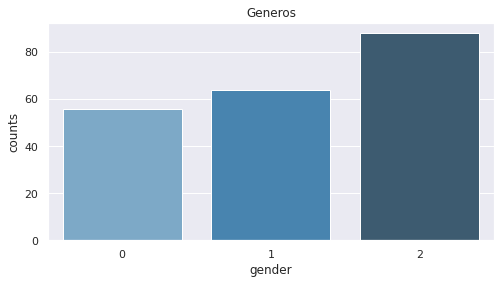

In [ ]:
df = submmit[["gender"]]
print(len(df.columns))
gr = df.groupby(['gender']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,4),nrows=1)
sns.barplot(data=gr, x='gender', y='counts', palette="Blues_d",ax=ax)
ax.set_title('Generos')
plt.show()
print("")

## imputer

In [ ]:
X = submmit.copy().drop(columns = ["gender","code_study","country"])

In [ ]:
X = imputer.transform(X)

## CHI2

In [ ]:
X_c = pd.DataFrame(skb_c.transform(X))
X_d = pd.DataFrame(skb_d.transform(X))
X_o = pd.DataFrame(skb_o.transform(X))

In [ ]:
X_c["gender"] = submmit['gender']
X_c["code_study"] = submmit['country']
X_c["country"] = submmit['code_study']

X_d["gender"] = submmit['gender']
X_d["code_study"] = submmit['country']
X_d["country"] = submmit['code_study']

X_o["gender"] = submmit['gender']
X_o["code_study"] = submmit['country']
X_o["country"] = submmit['code_study']

## Test

In [ ]:
Cirr = clfc.predict(X_c)
Diab = clfd.predict(X_d)
Obes = clfo.predict(X_o)

## Generar dataframe

In [ ]:
df1 = submmit.copy()
df1['Cirrhosis'] = Cirr
df1['Obesity'] = Obes
df1['Diabetes'] = Diab

pruebas = df1[['Cirrhosis','Obesity','Diabetes']]

In [ ]:
pruebas

,Cirrhosis,Obesity,Diabetes
Id,,,
0,1.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,1.0
...,...,...,...
203,0.0,1.0,0.0
204,1.0,1.0,1.0
205,0.0,1.0,0.0


1


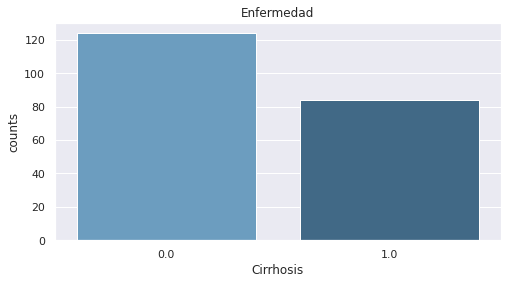

In [ ]:
df = pruebas[["Cirrhosis"]]
print(len(df.columns))
gr = df.groupby(['Cirrhosis']).size().reset_index(name='counts')
fig, ax = plt.subplots(figsize=(8,4),nrows=1)
sns.barplot(data=gr, x='Cirrhosis', y='counts', palette="Blues_d",ax=ax)
ax.set_title('Enfermedad')
plt.show()
print("")

In [ ]:
pruebas.to_csv('predicciones.csv') #Convertimos a csv